# Predicting Voter Registration Party Affiliation

Irv Campbell and Steven Dye

Module 4: Logistic Regression

## Problem Statement

### Can we predict what political party voters in North Carolina change to based on their current political party affiliation and by what county they live in?

We attempted to predict what political party voters in North Carolina changed to based on their previous political party and by what county they live in.

## Data

The data was obtained from the North Carolina State Board of Elections website: https://www.ncsbe.gov/index.html on 12/2/2019. The data consists of six possible political party affiliations: Unaffiliated, Republican, Democratic, Libertarian, Constitutional, and Green. The data consisted of six features: County Name, County ID, Voter ID, Date Changed, Original Party, and New Party. We chose to only look at County ID and Original Party in order to predict the target New Party. The other features were ignored either due to repeating data or lack of a reasonable relation to the target. In total there are 121,591 entries in the data file.

In [1]:
import pandas as pd
df = pd.read_csv('data/2019_party_change_list.csv')
df.sample(5)

,county_id,county_name,year_change,voter_reg_num,party_from,party_to,change_dt
28060,32,DURHAM,2019,30327552,REP,UNA,05/03/2019
14099,16,CARTERET,2019,116431,UNA,DEM,10/01/2019
88990,76,RANDOLPH,2019,188827,UNA,DEM,08/05/2019
2223,3,ALLEGHANY,2019,11653,REP,DEM,08/22/2019
102745,92,WAKE,2019,10221584,UNA,DEM,01/30/2019


## EDA

In [2]:
from viz import make_percent_df

df_percent = make_percent_df(df)
df_percent

Party,Percent of Voters
UNA,0.46
REP,0.27
DEM,0.24
LIB,0.02
CST,0.01
GRE,0


Due to their low frequency, entries that are either joining or leaving the Libertarian, Constitutional, or Green parties were removed. SMOTE data was created to deal with the unbalanced sampling. The new data files were saved in the data folder.

## Methodology

We performed a train test split on our labeled data in order to train and validate our model. In order to balance the Democratic and Republican targets with the Unaffiliated target, we used the Synthetic Minority Over-sampling Technique (SMOTE) to create synthetic data for the Republican and Democratic outcomes. We used a Multinomial Logistic Regression Model to make our predictions. A grid search was then used to find the best hyper parameters. For our model we focused on the C and penalty parameters. The grid search recommended a value of 1.0 for C and l2 (Lasso) for the penalty. The 'saga' solver was used for it's speed and for its compatibility with Lasso.

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from data_prep import data_preprocessing

X_train, y_train, X_test, y_test = data_preprocessing()

tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                     'penalty': ['l1', 'l2']}]

clfnc_tuned = GridSearchCV(LogisticRegression(multi_class='multinomial',
                                              solver='saga'),
                           tuned_parameters, cv=5)

clfnc_tuned.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## Data Visualization

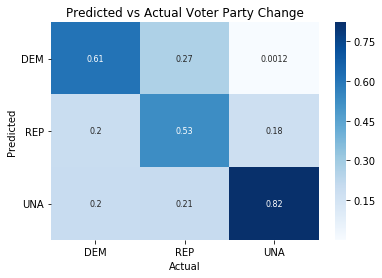

In [4]:
from viz import confusion_matrix_heat_map
%matplotlib inline

confusion_matrix_heat_map(clfnc_tuned, X_test, y_test)

The overall score for our model on the test data is:

In [5]:
clfnc_tuned.score(X_test, y_test)

0.6845786302887612

## Findings and Conclusions

- Algorithm predicts with close to 70% accuracy
- Unaffiliated predicted with greater than 80% accuracy

Predictive power seems relatively high considering that only two features were used.

It also makes sense that the "Unaffiliated" party was predicted with a higher accuracy since the original data (non-SMOTE'd data) was the dominant target with greater than 40,000 voters. 

## Future Work

Additional work moving forward wil include:
- adding more features to the model (how often a voter votes, last time a voter voted, type of election last voted in -- all these represent voter engagement levels) 
- adding more data to the model from previous years

https://dl.ncsbe.gov/index.html?prefix=ENRS/